## **OJECTIVE : Training classification model to find the model which would optimally classify legitimate and malicious domains.**

Our dataset consist of 450k samples of legitimate and malicious domain urls,in this notebook we'll first explore the dataset and then train a classifier model which would optimally predict phishing and legitimate urls.

**NOTE** : Our dataset is Imbalanced. We'll use SMOTE to oversample dataset.

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Exploratory Data Analysis**

We have 21 features out of which 18 features were extracted from dataset in the previous notebook, the 'results' feature is the ground truth while the remaining 2 features ('url' , 'label') are only there for reference and can will be removed during training of the model.

In [2]:
# loading out dataset from previous notebook
urldata = pd.read_csv(r"C:\MyFolders\Projects\minor project\patent2\MOREFEATURES\Url_Processed.csv")

# droping "Unnamed: 0" as its unncessary feature
urldata.drop("Unnamed: 0",axis=1,inplace=True)

urldata.head(10)

,url,label,result,url_length,hostname_length,path_length,fd_length,count-,count@,count?,...,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url,subdomain_count,entropy,digit_proportion,suspicious_keyword
0,https://www.google.com,benign,0,22,14,0,0,0,0,0,...,1,0,17,0,1,1,1,3.292770,0.0,0
1,https://www.youtube.com,benign,0,23,15,0,0,0,0,0,...,1,0,18,0,1,1,1,3.419382,0.0,0
2,https://www.facebook.com,benign,0,24,16,0,0,0,0,0,...,1,0,19,0,1,1,1,3.536887,0.0,0
3,https://www.baidu.com,benign,0,21,13,0,0,0,0,0,...,1,0,16,0,1,1,1,3.577820,0.0,0
4,https://www.wikipedia.org,benign,0,25,17,0,0,0,0,0,...,1,0,20,0,1,1,1,3.484184,0.0,0
5,https://www.reddit.com,benign,0,22,14,0,0,0,0,0,...,1,0,17,0,1,-1,1,3.410417,0.0,0
6,https://www.yahoo.com,benign,0,21,13,0,0,0,0,0,...,1,0,16,0,1,1,1,3.155639,0.0,0
7,https://www.google.co.in,benign,0,24,16,0,0,0,0,0,...,1,0,18,0,1,1,2,3.419382,0.0,0
8,https://www.qq.com,benign,0,18,10,0,0,0,0,0,...,1,0,13,0,1,1,1,3.026987,0.0,0
9,https://www.amazon.com,benign,0,22,14,0,0,0,0,0,...,1,0,17,0,1,1,1,3.337175,0.0,0


In [3]:
urldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   url                 450176 non-null  object 
 1   label               450176 non-null  object 
 2   result              450176 non-null  int64  
 3   url_length          450176 non-null  int64  
 4   hostname_length     450176 non-null  int64  
 5   path_length         450176 non-null  int64  
 6   fd_length           450176 non-null  int64  
 7   count-              450176 non-null  int64  
 8   count@              450176 non-null  int64  
 9   count?              450176 non-null  int64  
 10  count%              450176 non-null  int64  
 11  count.              450176 non-null  int64  
 12  count=              450176 non-null  int64  
 13  count-http          450176 non-null  int64  
 14  count-https         450176 non-null  int64  
 15  count-www           450176 non-nul

label
benign       345738
malicious    104438
Name: count, dtype: int64


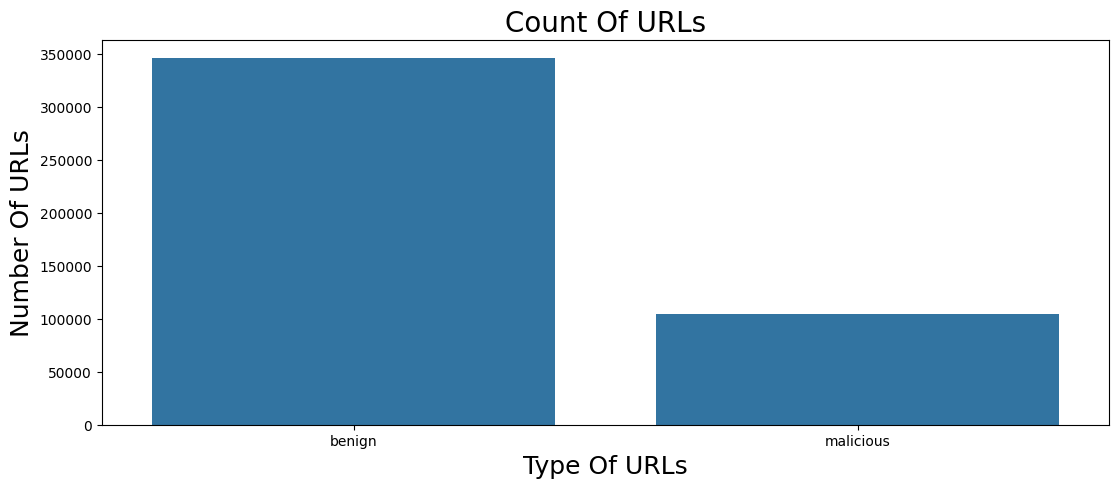

In [4]:
# Lets find how many malicious and non-malicious samples we have
i = urldata["label"].value_counts()
print(i)

plt.figure(figsize=(13,5))
sns.countplot(x='label',data=urldata)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)
plt.show()

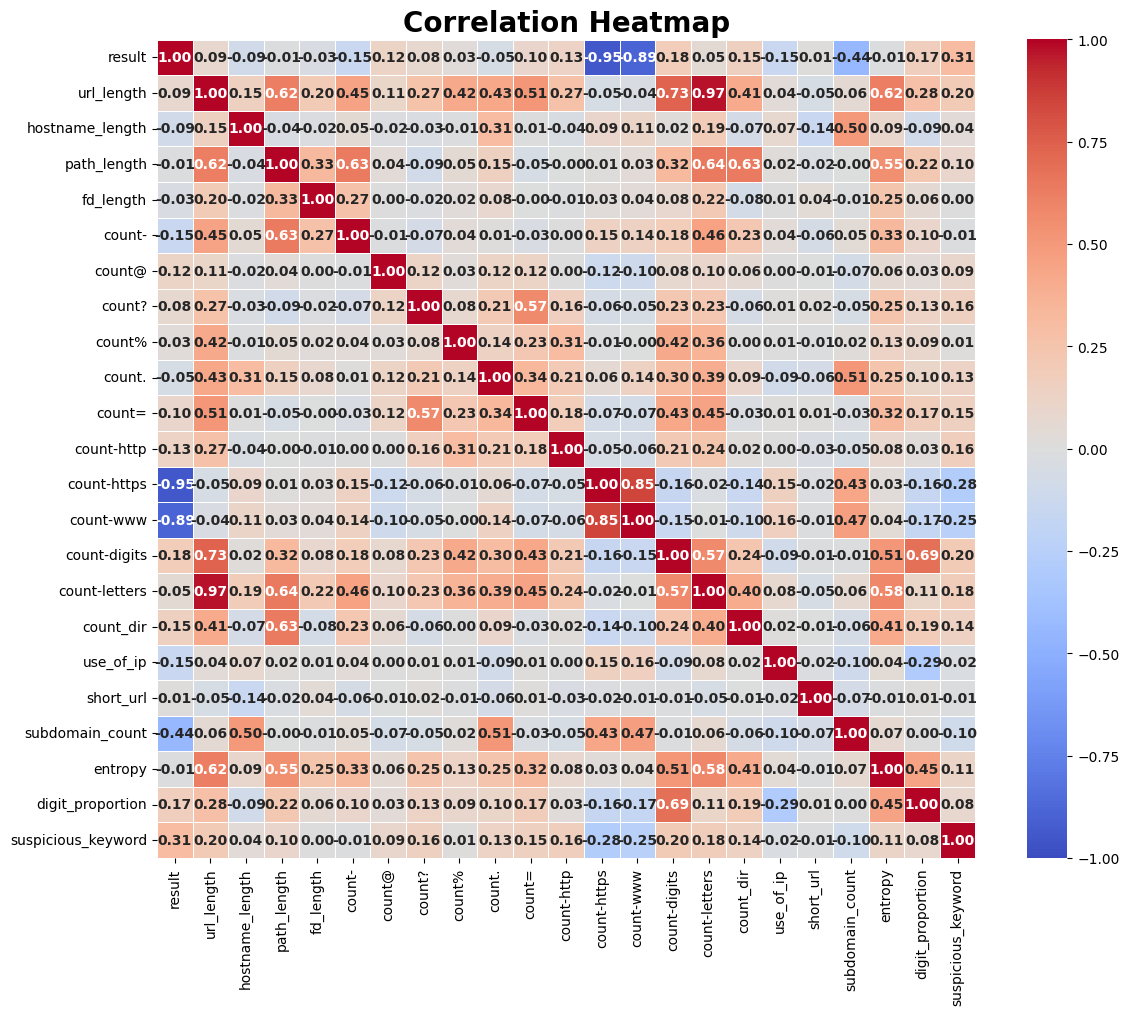

In [58]:

#Correlation Heatmap
numeric_data = urldata.select_dtypes(include=['number'])

# Calculate the correlation matrix
corrmat = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corrmat, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1,
            annot_kws={'size': 10, 'weight': 'bold'}, square=True)
plt.title('Correlation Heatmap', size=20, weight='bold')
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

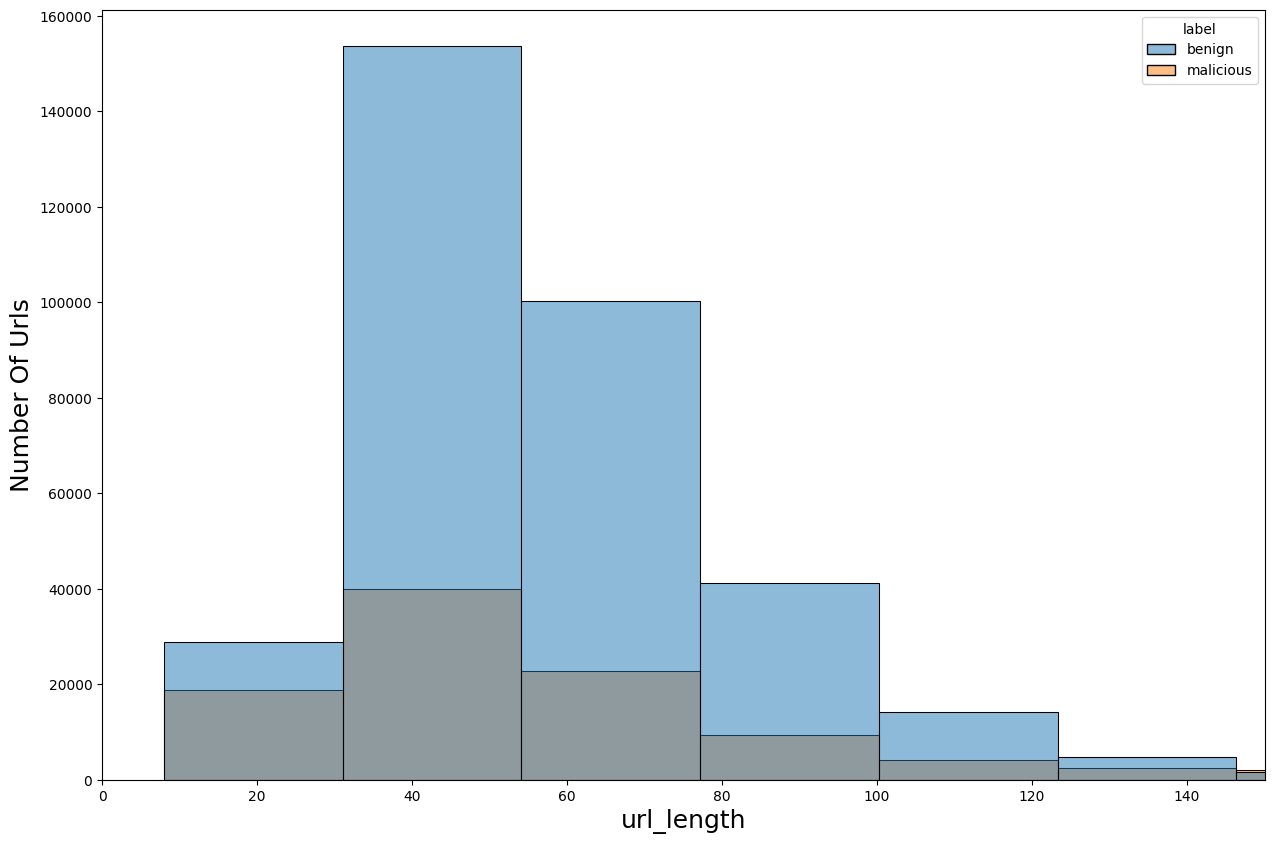

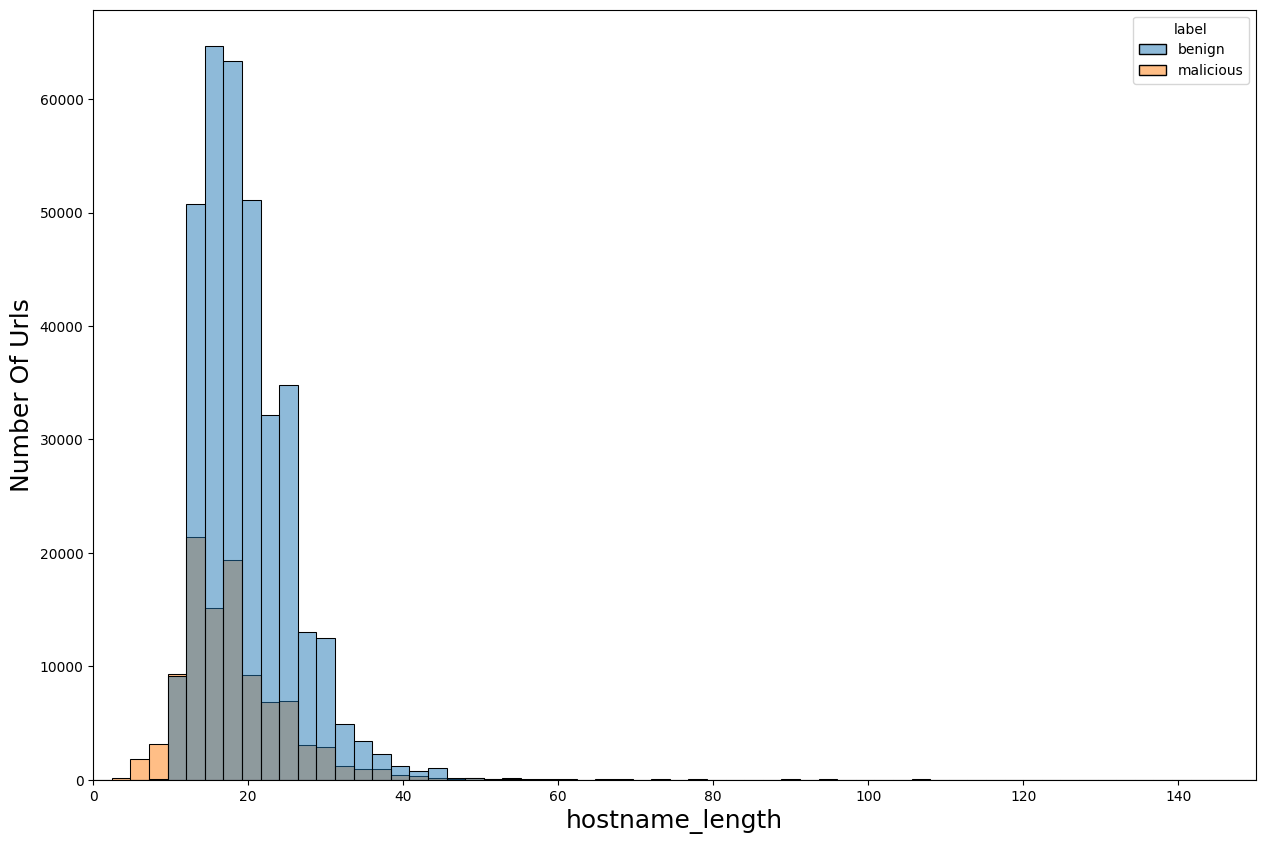

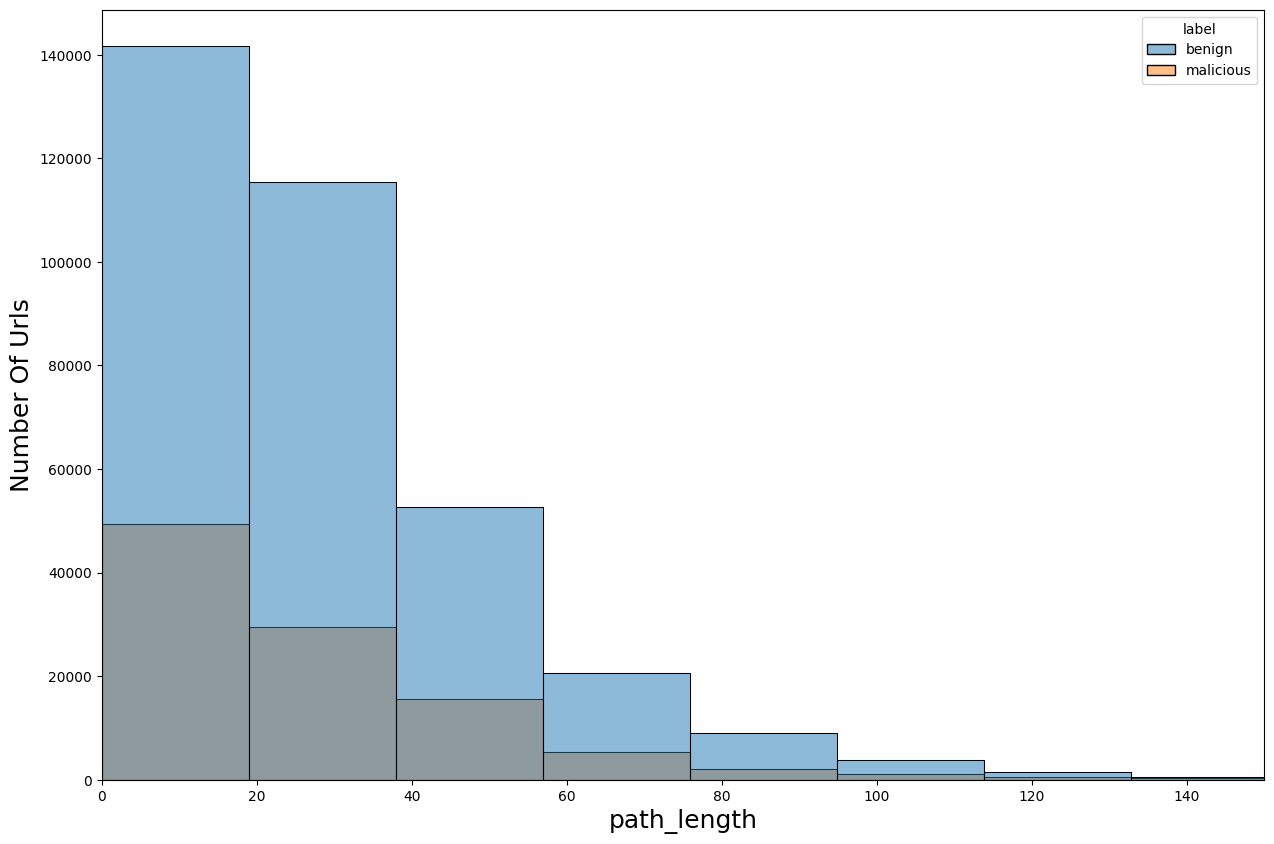

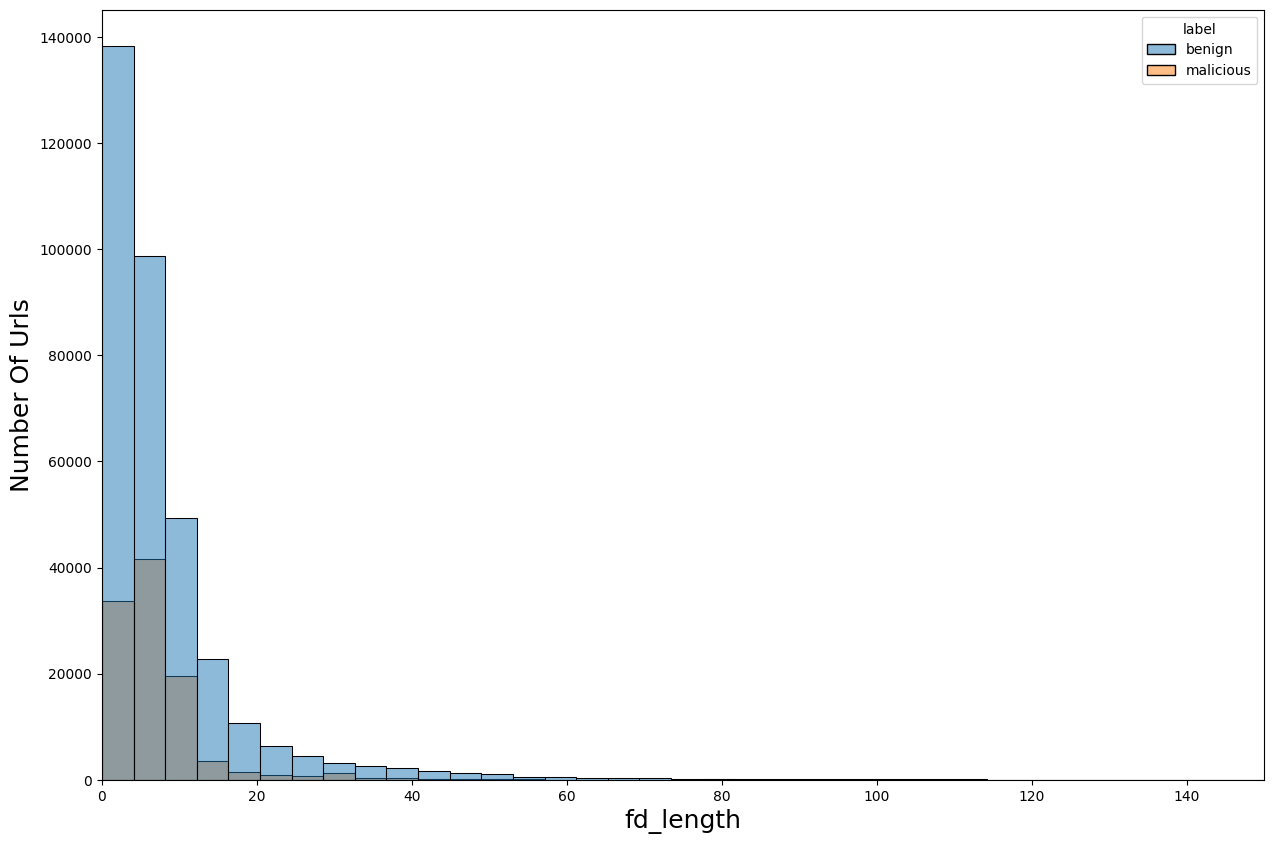

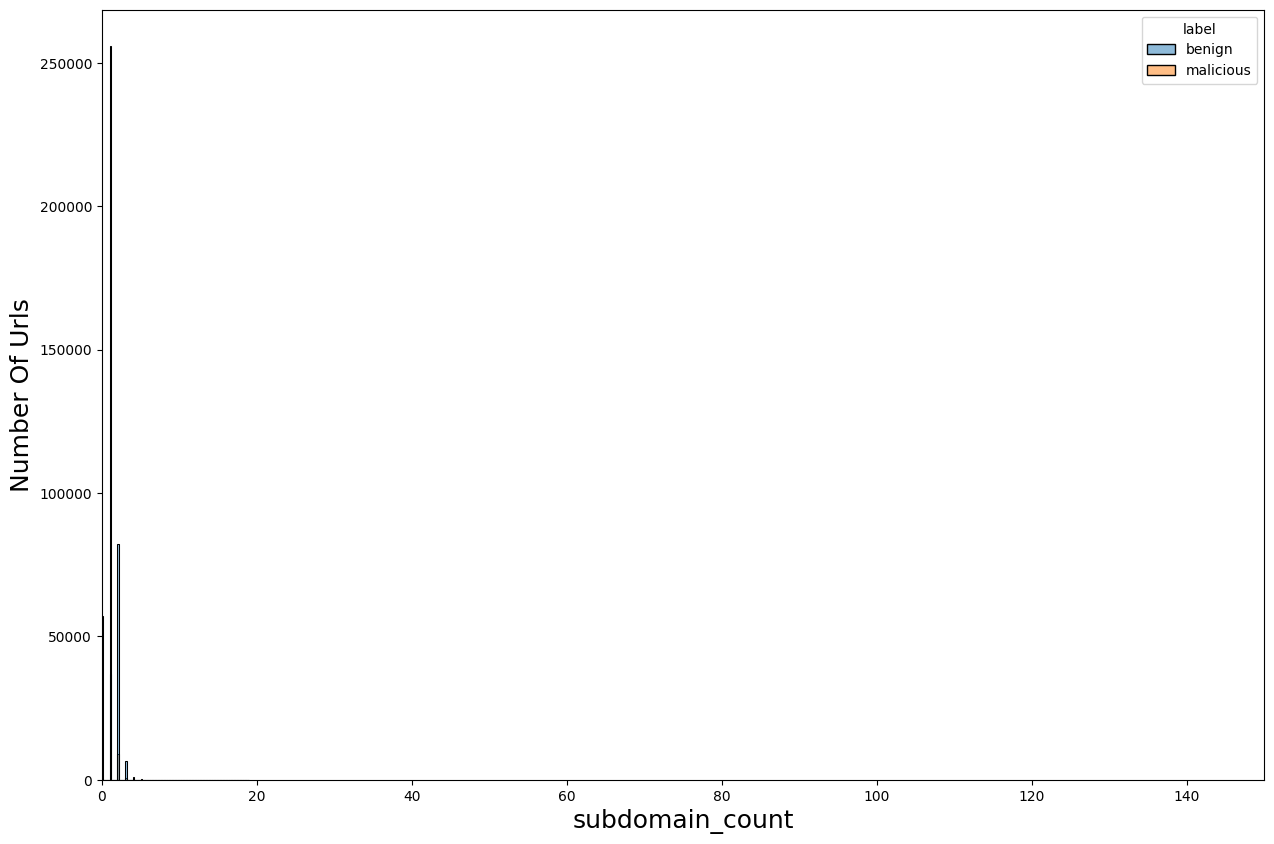

In [6]:
# setting plot sizes
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,10

# plotting distrubutions
features = list(urldata.columns) # list of feature names
features.remove("url")
features.remove("result")

hist_features = ["url_length","hostname_length","path_length","fd_length","subdomain_count"]

for i in hist_features:
   sns.histplot(data=urldata,x=i,bins=100,hue='label')
   plt.xlabel(i,fontsize=18)
   plt.ylabel("Number Of Urls",fontsize=18)
   plt.xlim(0,150)
   plt.show()

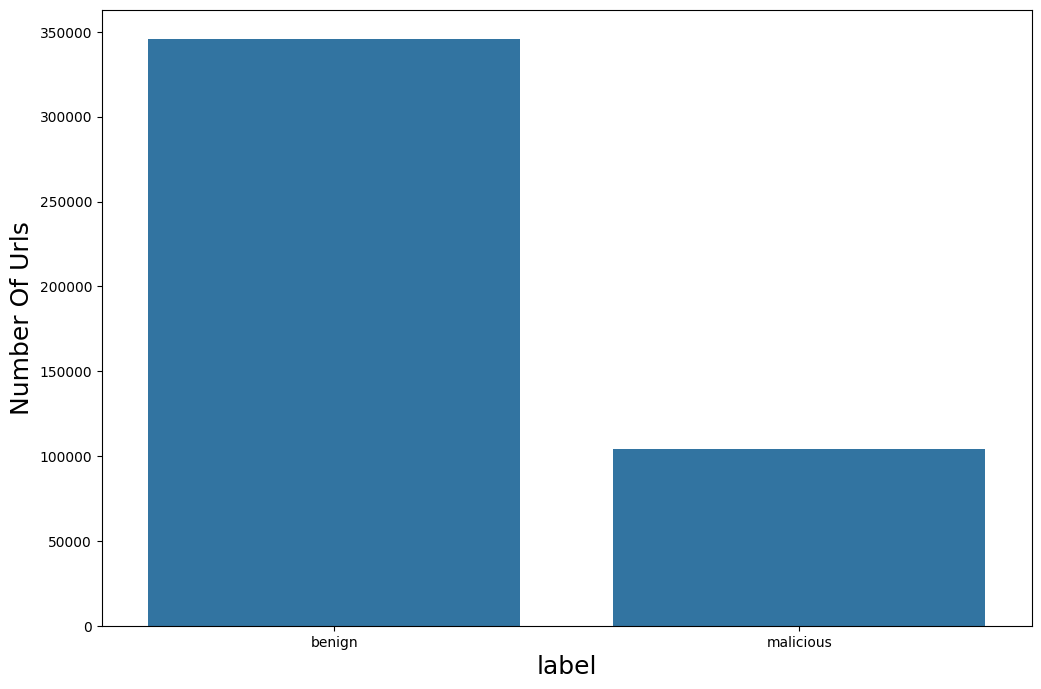

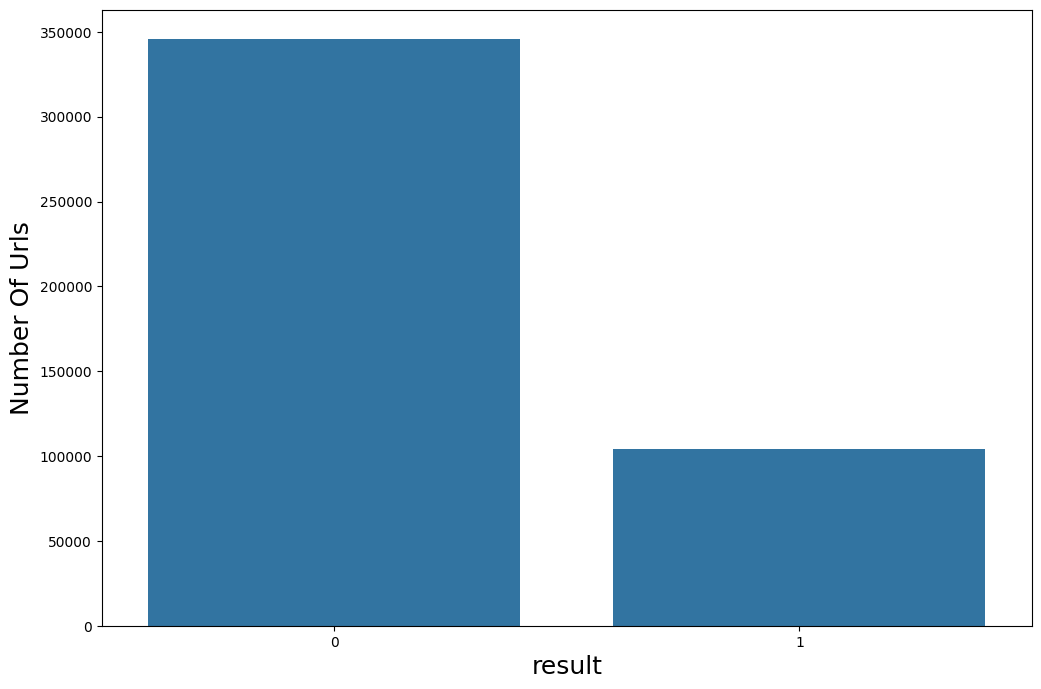

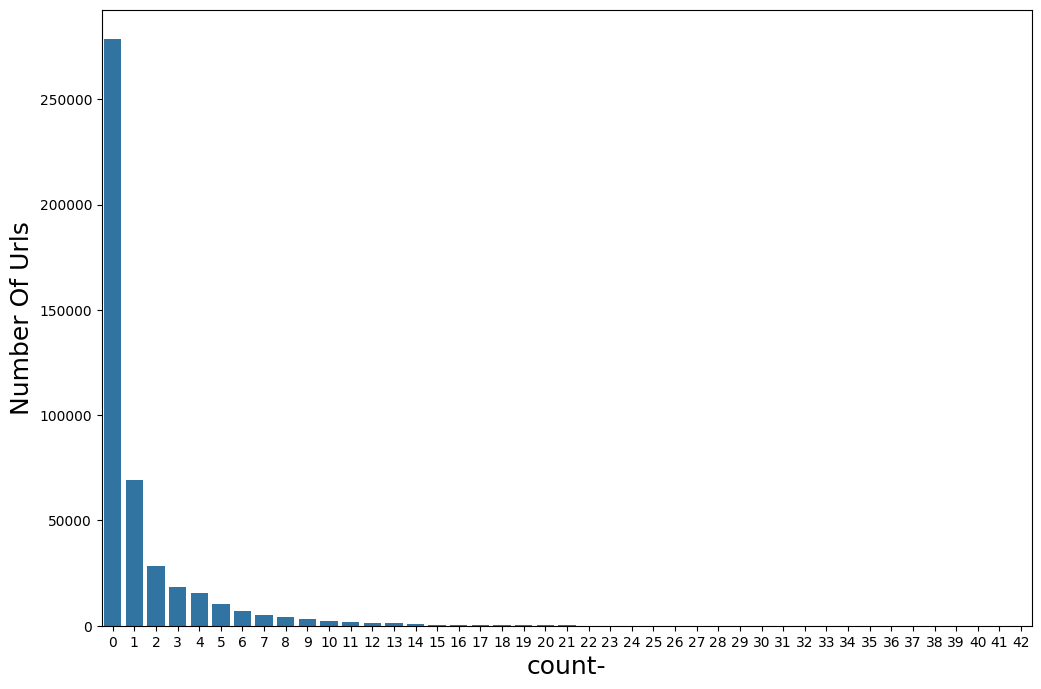

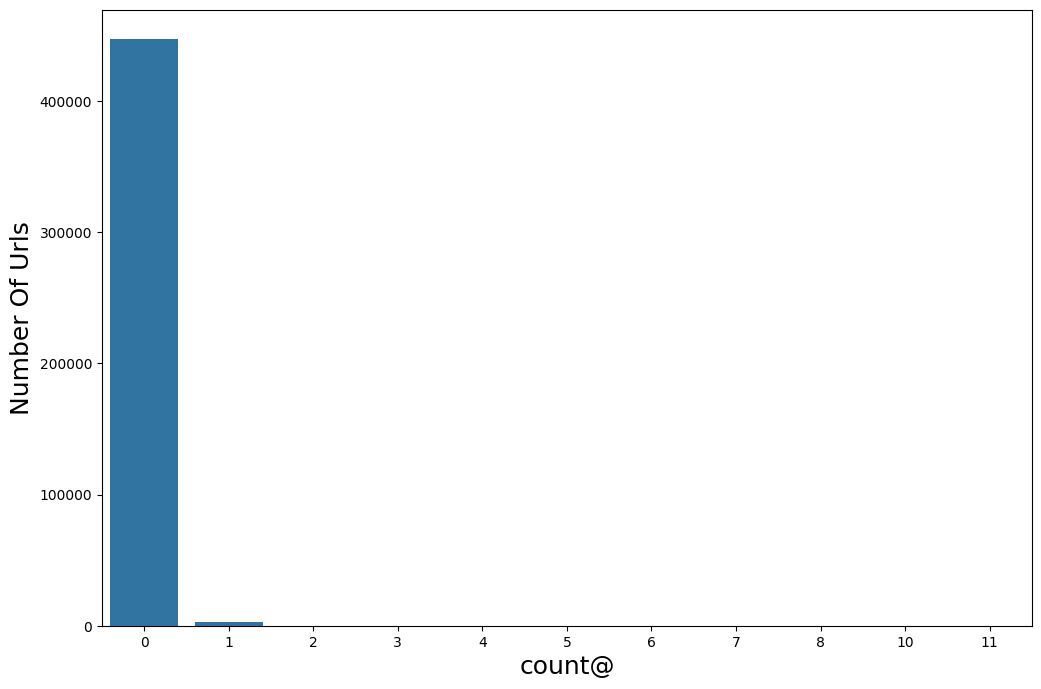

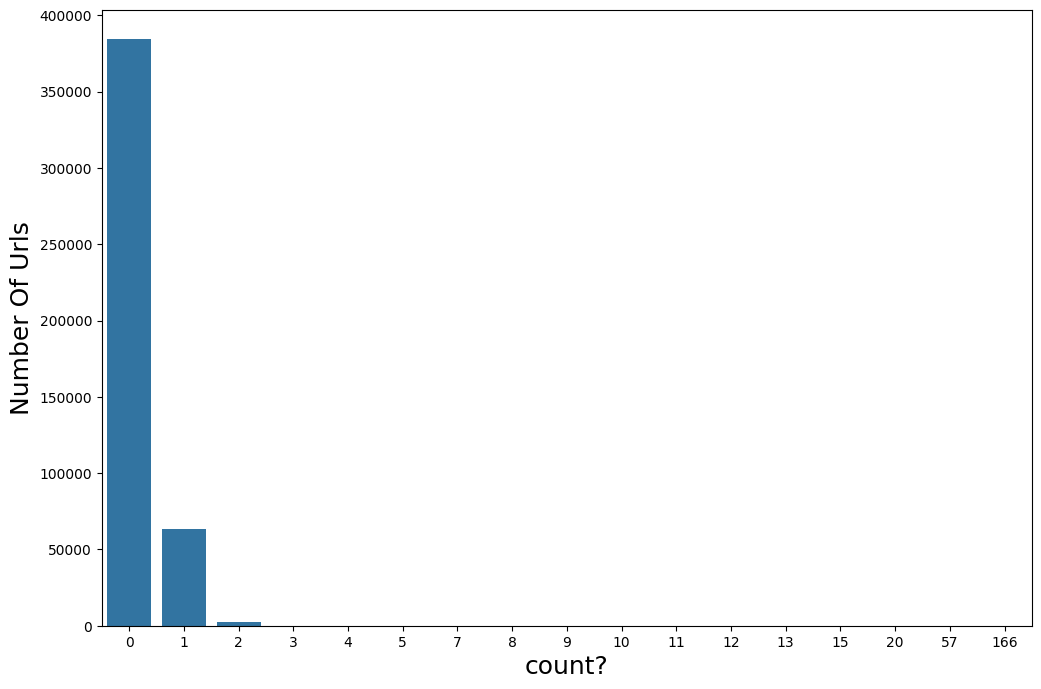

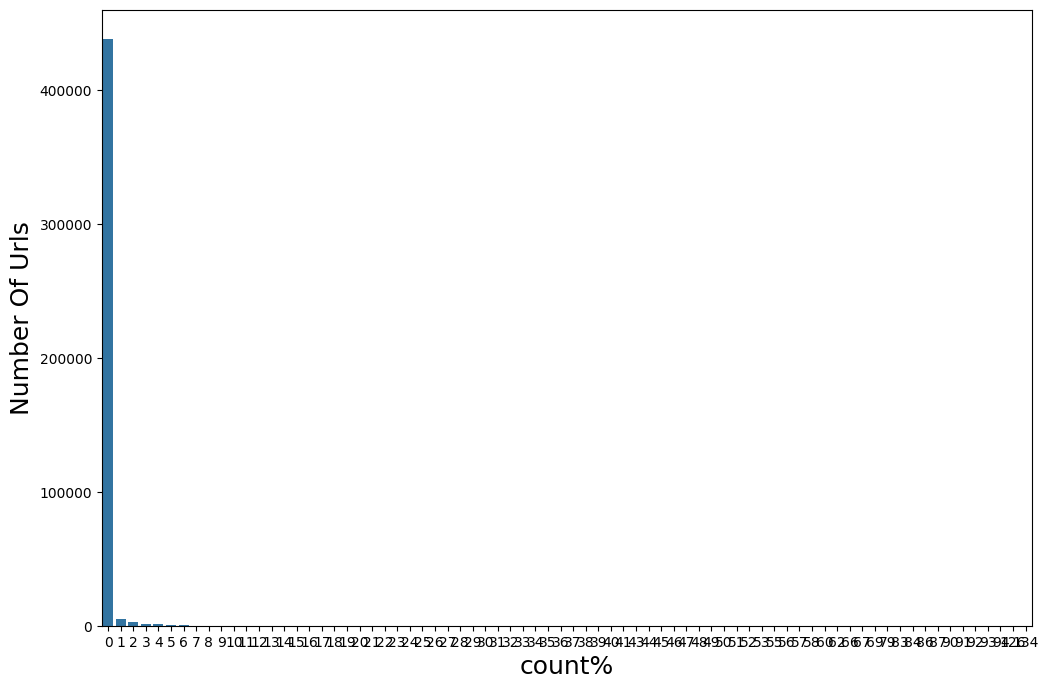

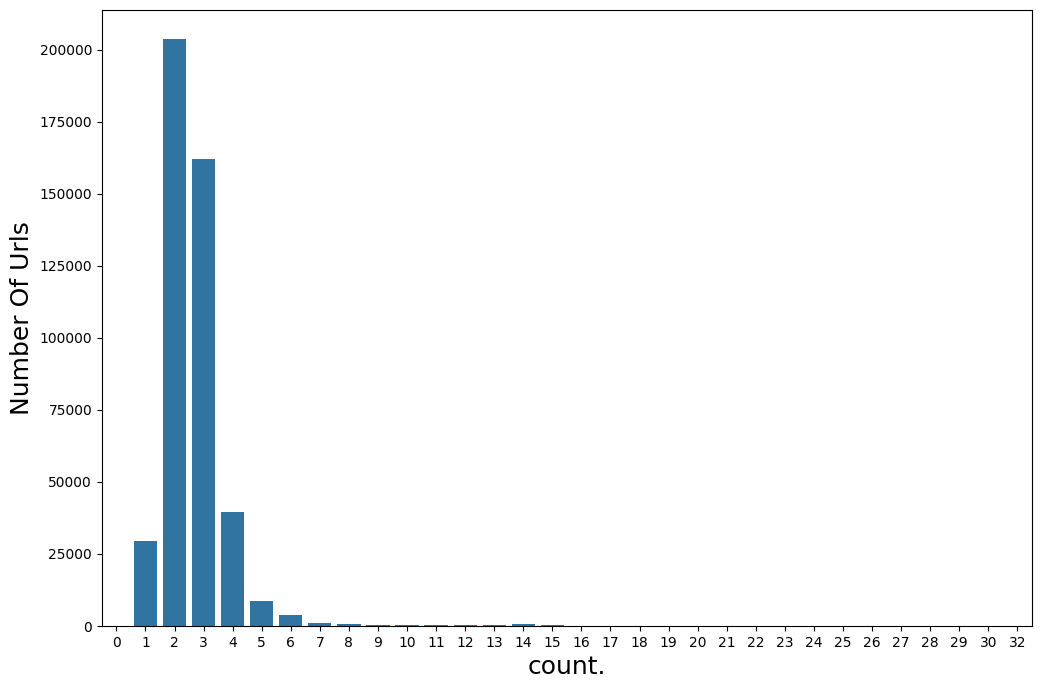

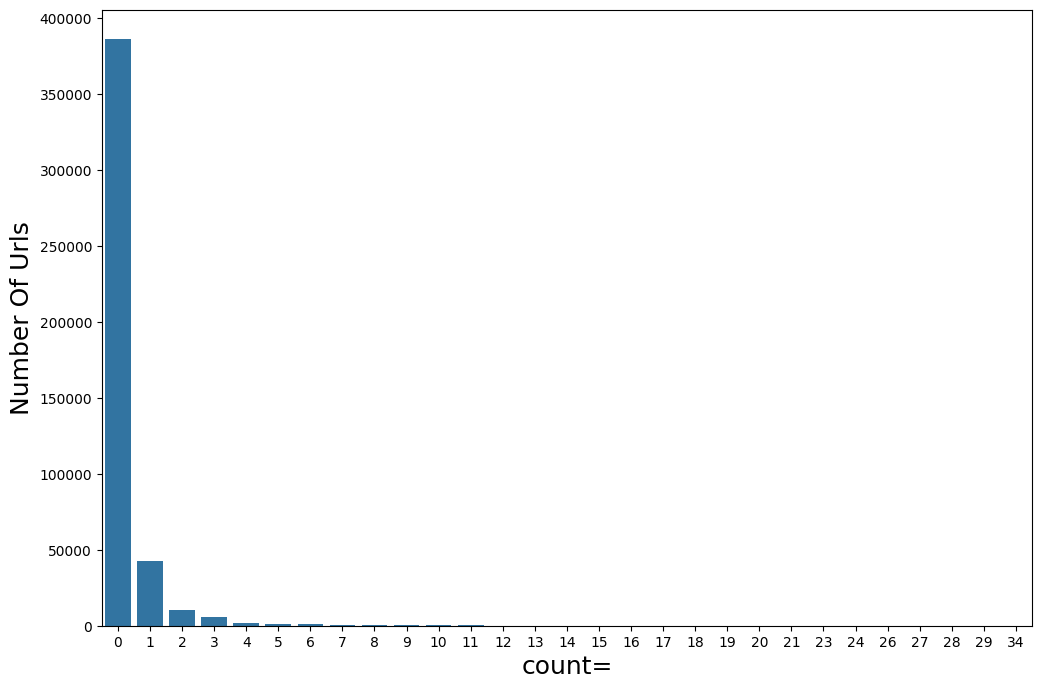

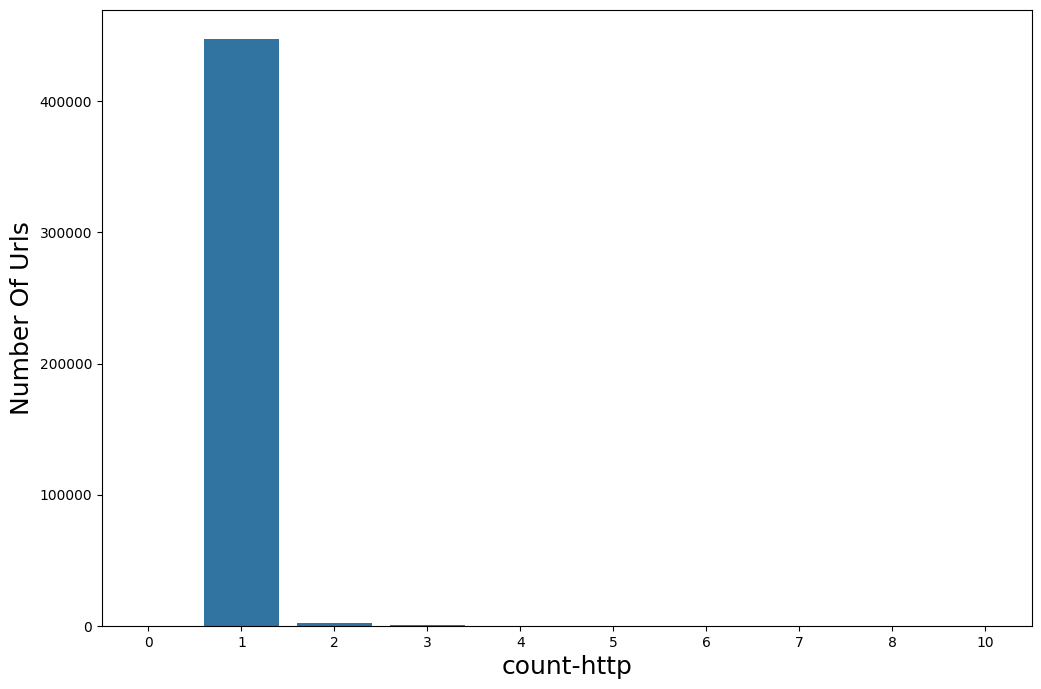

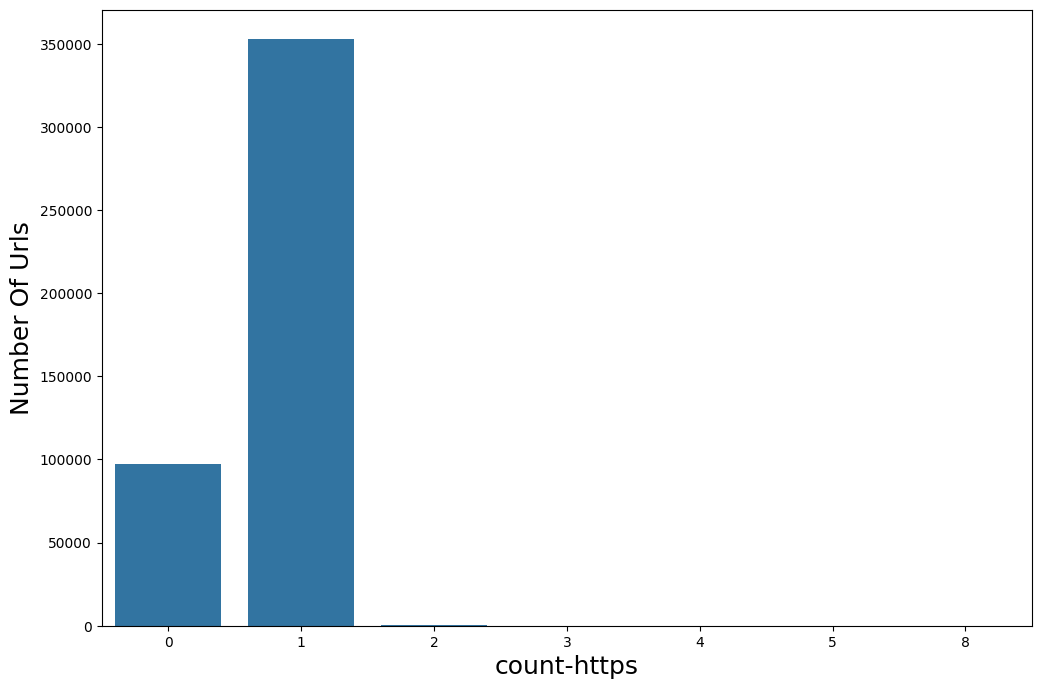

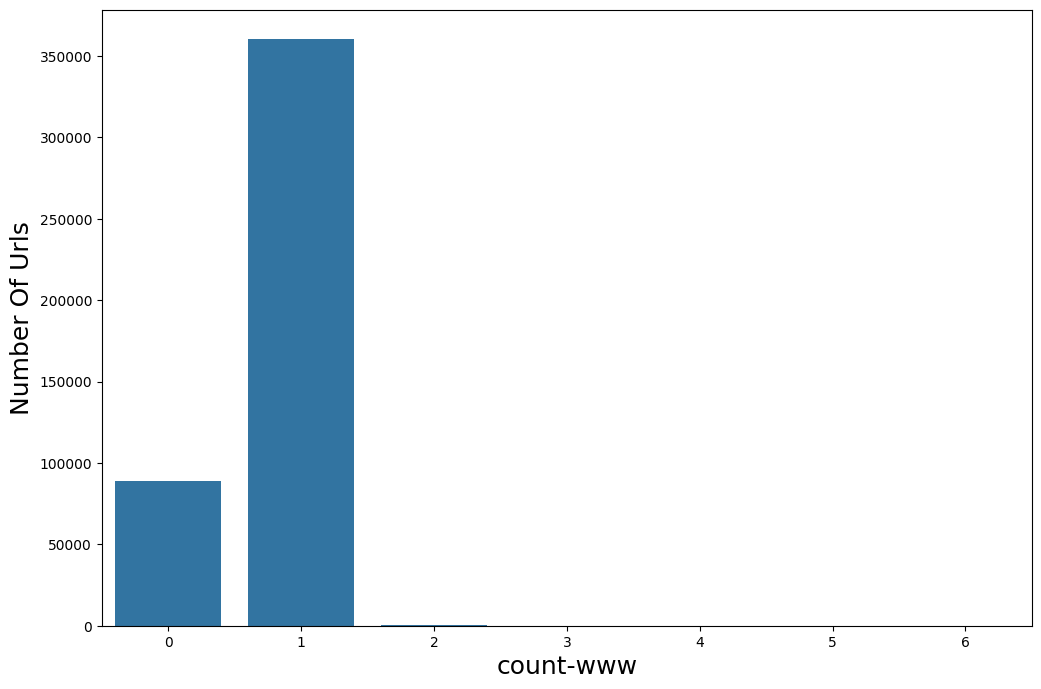

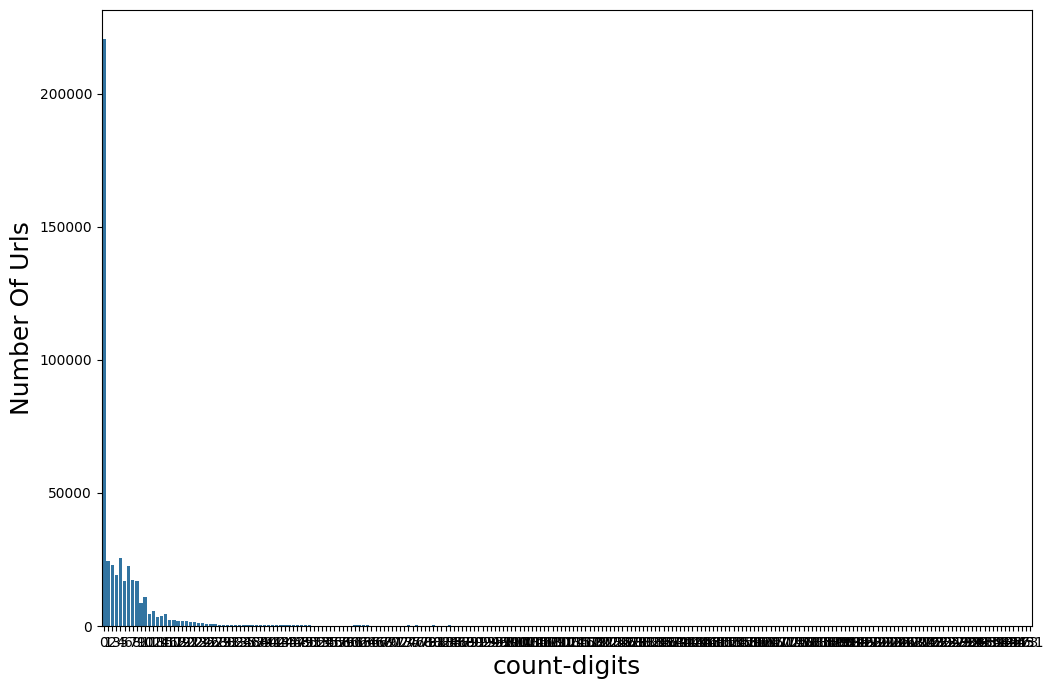

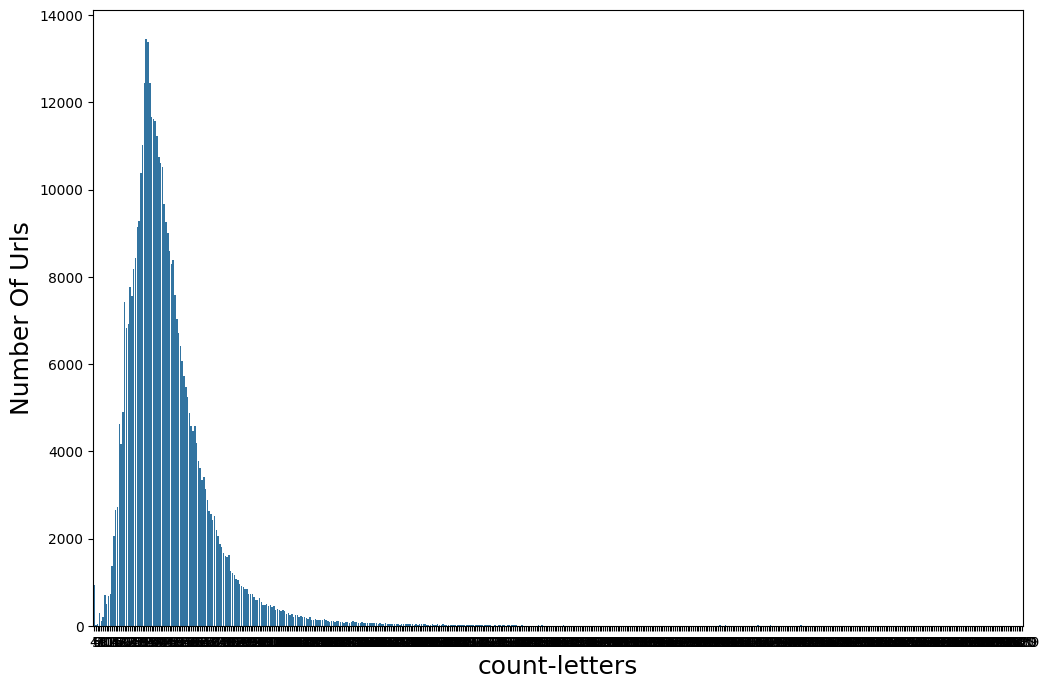

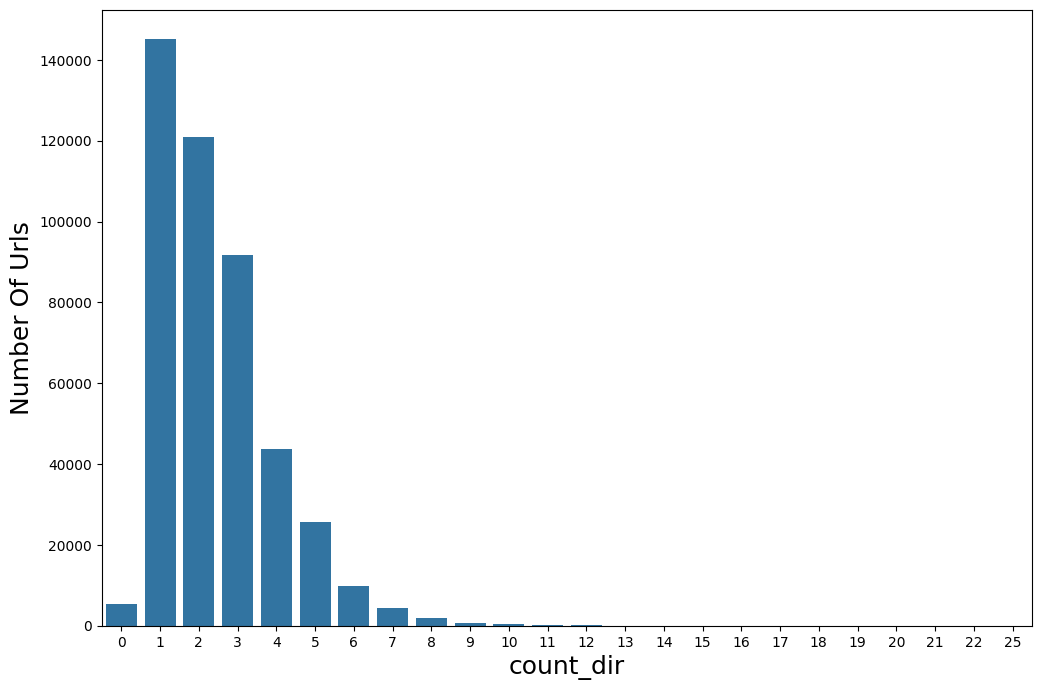

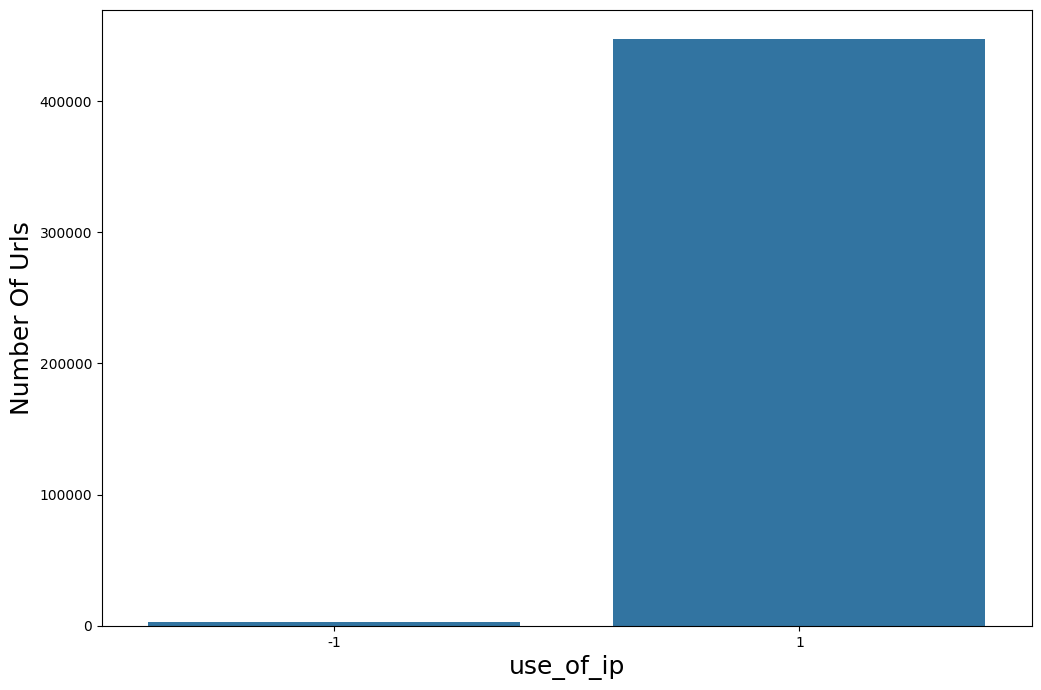

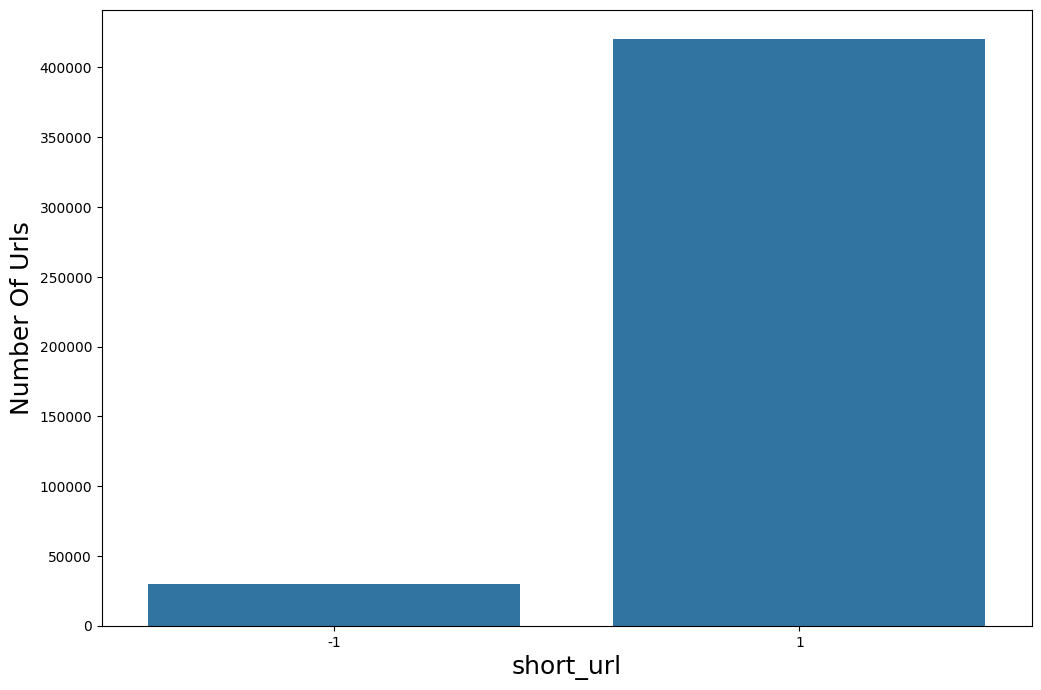

KeyboardInterrupt: 

In [7]:
# plotting distrubutions

features = list(urldata.columns) # list of feature names
features.remove("url")

rcParams['figure.figsize'] = 12,8

for i in features:
   
   if i in hist_features:
     continue
   
   sns.countplot(x=i,data=urldata)
   plt.xlabel(i,fontsize=18)
   plt.ylabel("Number Of Urls",fontsize=18)
   plt.show()
  

# **Model Training**

Before training our models we'll split the data into train and test dataset. We'll train multiple models and choose the one which gives us the best validation-accuracy. This problem falls under "Binary classification" and some of the models we'll train are :
- Decision Tree
- Random Forest
- Multilayer Perceptron (deep learning)

### **Data Splitting**

We'll follow a 80:20 ratio for data splitting,where we use 80% of data for training and 20% for testing.

In [9]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,count-,count@,count?,...,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url,subdomain_count,entropy,digit_proportion,suspicious_keyword
0,https://www.google.com,benign,0,22,14,0,0,0,0,0,...,1,0,17,0,1,1,1,3.292770,0.0,0
1,https://www.youtube.com,benign,0,23,15,0,0,0,0,0,...,1,0,18,0,1,1,1,3.419382,0.0,0
2,https://www.facebook.com,benign,0,24,16,0,0,0,0,0,...,1,0,19,0,1,1,1,3.536887,0.0,0
3,https://www.baidu.com,benign,0,21,13,0,0,0,0,0,...,1,0,16,0,1,1,1,3.577820,0.0,0
4,https://www.wikipedia.org,benign,0,25,17,0,0,0,0,0,...,1,0,20,0,1,1,1,3.484184,0.0,0


In [10]:
# remove uneccessary columns
urldata.drop(["url","label"],axis=1,inplace=True)

urldata.head()

,result,url_length,hostname_length,path_length,fd_length,count-,count@,count?,count%,count.,...,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url,subdomain_count,entropy,digit_proportion,suspicious_keyword
0,0,22,14,0,0,0,0,0,0,2,...,1,0,17,0,1,1,1,3.292770,0.0,0
1,0,23,15,0,0,0,0,0,0,2,...,1,0,18,0,1,1,1,3.419382,0.0,0
2,0,24,16,0,0,0,0,0,0,2,...,1,0,19,0,1,1,1,3.536887,0.0,0
3,0,21,13,0,0,0,0,0,0,2,...,1,0,16,0,1,1,1,3.577820,0.0,0
4,0,25,17,0,0,0,0,0,0,2,...,1,0,20,0,1,1,1,3.484184,0.0,0


In [13]:
# NOTE : We'll use only lexical features for this notebook i,e not taking 'url_length' and 'short_url'

#Independent Variables
x = urldata[['hostname_length',
       'path_length', 'fd_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir', 'use_of_ip', 'subdomain_count', 'entropy', 'digit_proportion' , 'suspicious_keyword']]

#Dependent Variable
y = urldata['result']

In [15]:
# printing x
x.head()

,hostname_length,path_length,fd_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,subdomain_count,entropy,digit_proportion,suspicious_keyword
0,14,0,0,0,0,0,0,2,0,1,1,1,0,17,0,1,1,3.292770,0.0,0
1,15,0,0,0,0,0,0,2,0,1,1,1,0,18,0,1,1,3.419382,0.0,0
2,16,0,0,0,0,0,0,2,0,1,1,1,0,19,0,1,1,3.536887,0.0,0
3,13,0,0,0,0,0,0,2,0,1,1,1,0,16,0,1,1,3.577820,0.0,0
4,17,0,0,0,0,0,0,2,0,1,1,1,0,20,0,1,1,3.484184,0.0,0


In [16]:
# printing y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: result, dtype: int64

#### **Oversampling Imbalanced Dataset**

During EDA we found that our dataset is Imbalanced,so we'll now use SMOTE method to oversample the dataset.

In [21]:
#Oversampling using SMOTE
from imblearn.over_sampling import SMOTE

x_sample, y_sample = SMOTE().fit_resample(x, y.values.ravel())

x_sample = pd.DataFrame(x_sample)
y_sample = pd.DataFrame(y_sample)

In [22]:
# checking the sizes of the sample data
print("Size of x-sample :", x_sample.shape)
print("Size of y-sample :", y_sample.shape)

Size of x-sample : (691476, 20)
Size of y-sample : (691476, 1)


In [24]:
# DATA SPLITTING 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size = 0.2)
print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_test.shape)

Shape of x_train:  (553180, 20)
Shape of x_valid:  (138296, 20)
Shape of y_train:  (553180, 1)
Shape of y_valid:  (138296, 1)


## **1] Decision Tree**

A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes).

In [25]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=7)

# start training the model
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7)

#### **Model Performance Evaluation**

In [26]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# finding y_pred for train and test dataset
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# finding accuracy on train dataset
train_acc = accuracy_score(y_train,y_pred_train)
test_acc = accuracy_score(y_test,y_pred_test)

print("Accuracy on Training dataset : ",round(train_acc,3))
print("Accuracy on Testing dataset : ",round(test_acc,3))

Accuracy on Training dataset :  0.998
Accuracy on Testing dataset :  0.998


In [27]:
# calculating other classification metrics
print(classification_report(y_pred_test,y_test,target_names=["legitimate","malicious"]))

              precision    recall  f1-score   support

  legitimate       1.00      1.00      1.00     69137
   malicious       1.00      1.00      1.00     69159

    accuracy                           1.00    138296
   macro avg       1.00      1.00      1.00    138296
weighted avg       1.00      1.00      1.00    138296



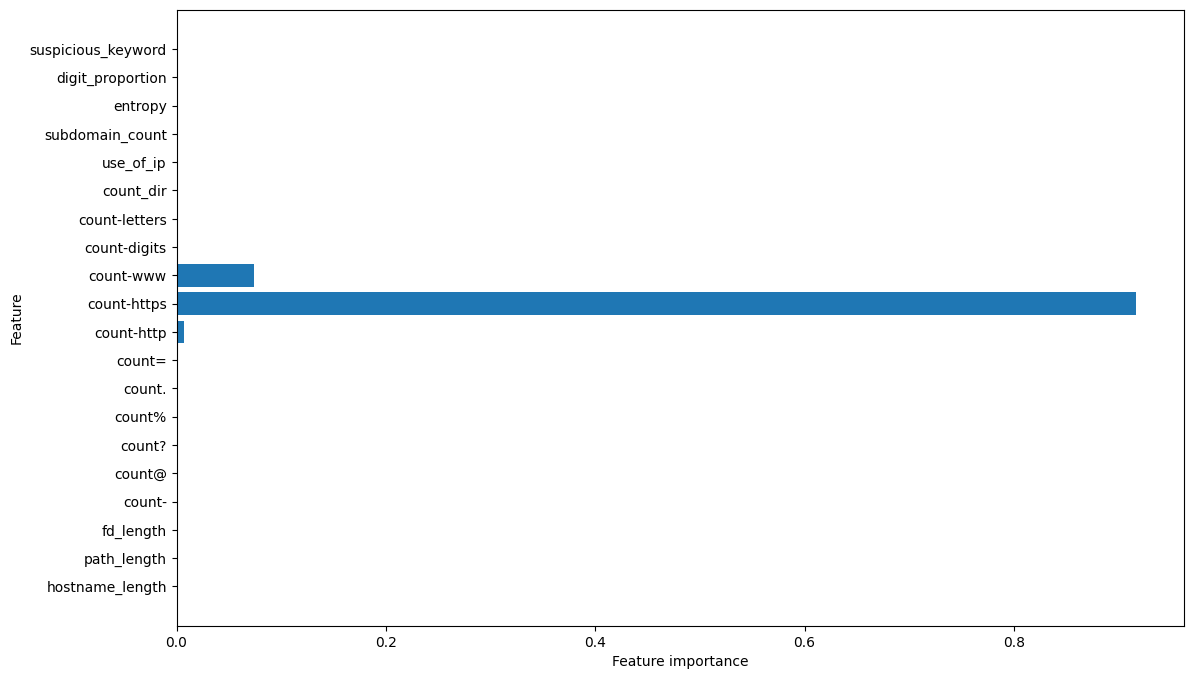

In [29]:

feature_names = ['hostname_length',
       'path_length', 'fd_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir', 'use_of_ip', 'subdomain_count', 'entropy', 'digit_proportion' , 'suspicious_keyword']

#checking the feature improtance in the model
plt.figure(figsize=(13,8))
n_features = x_train.shape[1]
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(n_features),feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

## **2] Random Forest**
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees.

In [30]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=7)

# start training the model
model.fit(x_train,y_train)

c:\MyFolders\python_env\tfenv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=7)

#### **Model Performance Evaluation**

In [31]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# finding y_pred for train and test dataset
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# finding accuracy on train dataset
train_acc = accuracy_score(y_train,y_pred_train)
test_acc = accuracy_score(y_test,y_pred_test)

print("Accuracy on Training dataset : ",round(train_acc,3))
print("Accuracy on Testing dataset : ",round(test_acc,3))

Accuracy on Training dataset :  0.998
Accuracy on Testing dataset :  0.998


In [32]:
# calculating other classification metrics
print(classification_report(y_pred_test,y_test,target_names=["legitimate","malicious"]))

              precision    recall  f1-score   support

  legitimate       1.00      1.00      1.00     69132
   malicious       1.00      1.00      1.00     69164

    accuracy                           1.00    138296
   macro avg       1.00      1.00      1.00    138296
weighted avg       1.00      1.00      1.00    138296



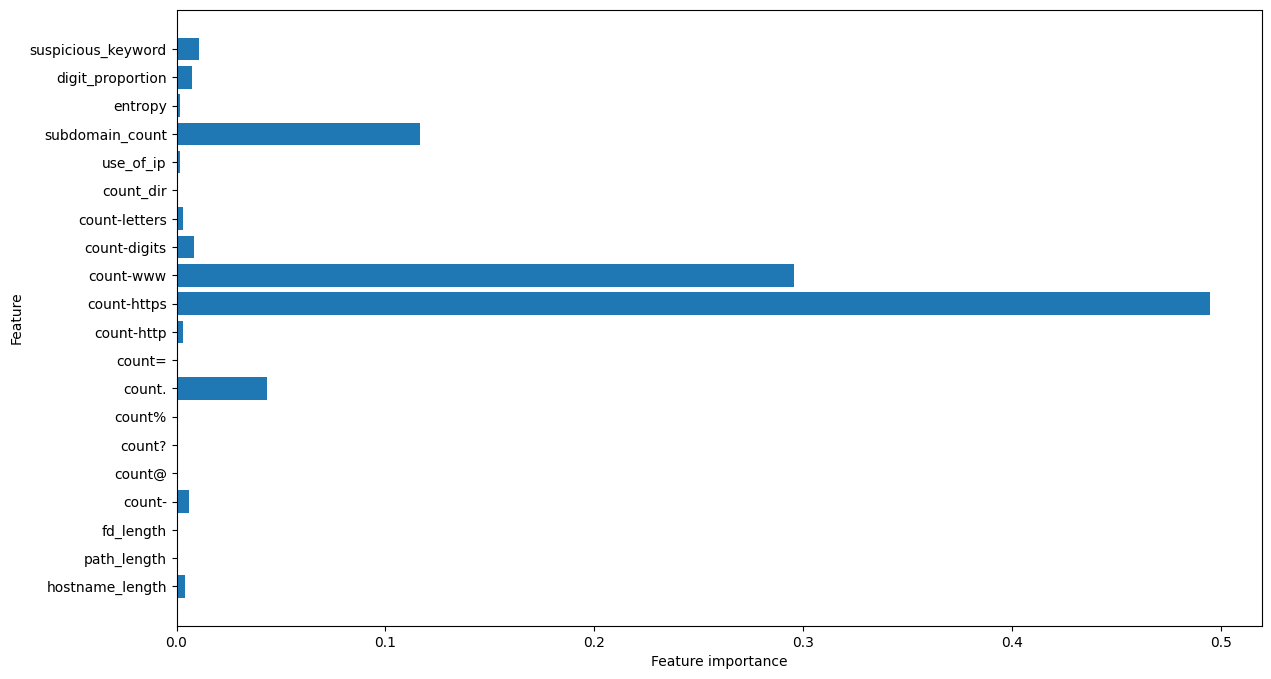

In [34]:

feature_names = ['hostname_length',
       'path_length', 'fd_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir', 'use_of_ip', 'subdomain_count', 'entropy', 'digit_proportion' , 'suspicious_keyword']

#checking the feature improtance in the model
plt.figure(figsize=(14,8))
n_features = x_train.shape[1]
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(n_features),feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

## **3] Multilayer Perceptron (Deep Learning)**
A multilayer perceptron (MLP) is a feedforward artificial neural network that generates a set of outputs from a set of inputs. An MLP is characterized by several layers of input nodes connected as a directed graph between the input and output layers. MLP uses backpropogation for training the network.

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization ,Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

In [61]:
# Check the shape of all datasets
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (553180, 20)
x_test shape: (138296, 20)
y_train shape: (553180, 1)
y_test shape: (138296, 1)


In [59]:
print(x_test.shape)  # Should be (num_samples, 20)

(138296, 20)


In [60]:
# Example prediction
predictions = model.predict(x_test)
print(predictions.shape)

4322/4322 [==============================] - 4s 986us/step
(138296, 1)


In [43]:
# model building
model = Sequential()
model.add(Dense(32, activation = 'relu', input_shape = (20, )))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                672       
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,345
Trainable params: 1,345
Non-trainable params: 0
_________________________________________________________________


In [45]:
# compiling model
opt = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer= opt ,loss='binary_crossentropy',metrics=['acc'])

In [46]:
# custom callback to stop the training when certain metric value is reached

# stop training when validation loss reach 0.1
class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_loss')<0.1):
            print("\nReached 0.1 val_loss so cancelling training!")
            self.model.stop_training = True
        
callback = myCallback()

In [47]:
print(x_train.shape)
print(x_test.shape)

(553180, 20)
(138296, 20)


In [48]:
# start training the model 
history = model.fit(x_train, y_train, epochs=10,batch_size=256, callbacks=[callback],validation_data=(x_test,y_test),verbose=1)

Epoch 1/10
2161/2161 [==============================] - 12s 4ms/step - loss: 0.6583 - acc: 0.7065 - val_loss: 0.2082 - val_acc: 0.9591
Epoch 2/10
2150/2161 [============================>.] - ETA: 0s - loss: 0.0940 - acc: 0.9805
Reached 0.1 val_loss so cancelling training!
2161/2161 [==============================] - 8s 4ms/step - loss: 0.0937 - acc: 0.9806 - val_loss: 0.0453 - val_acc: 0.9931


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


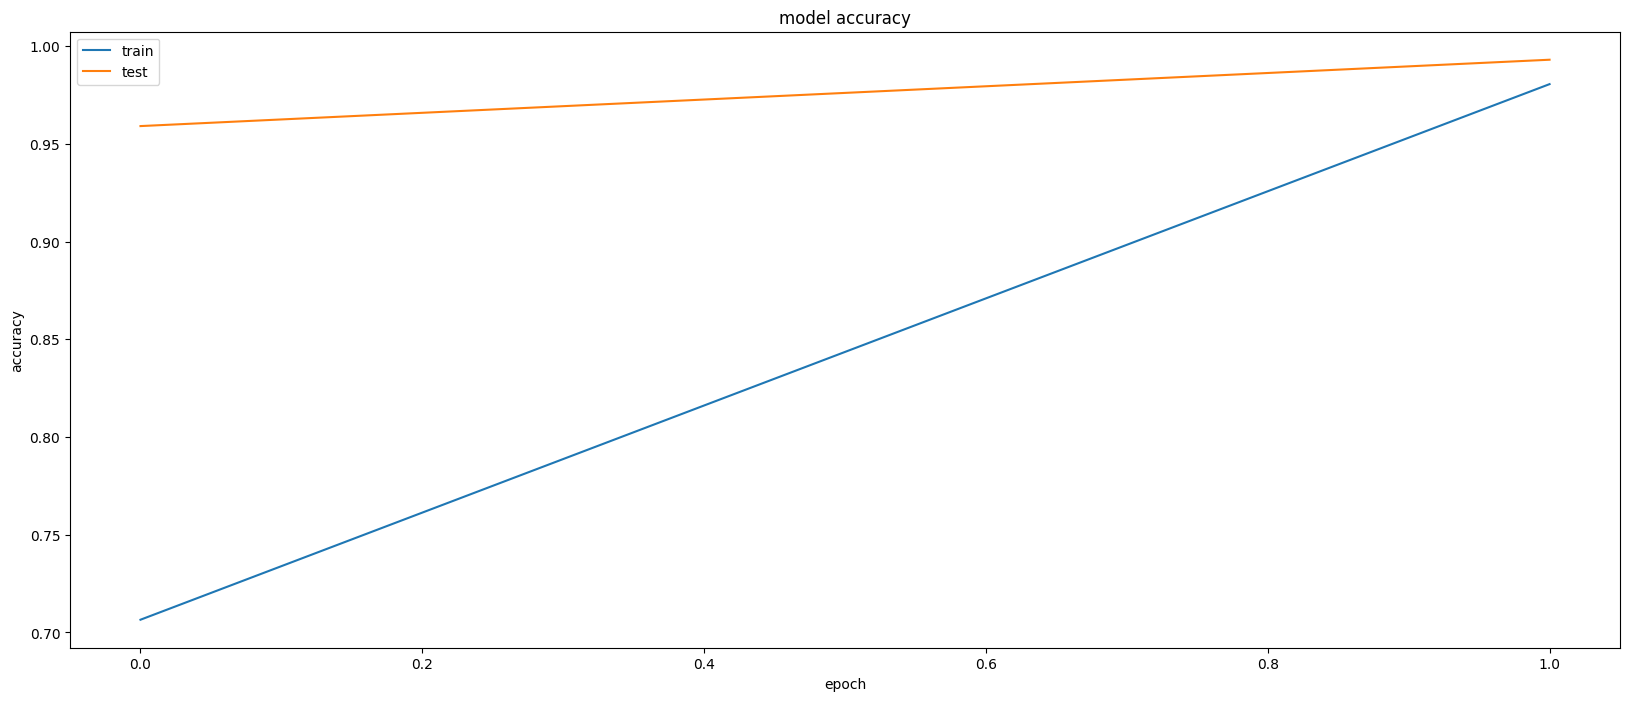

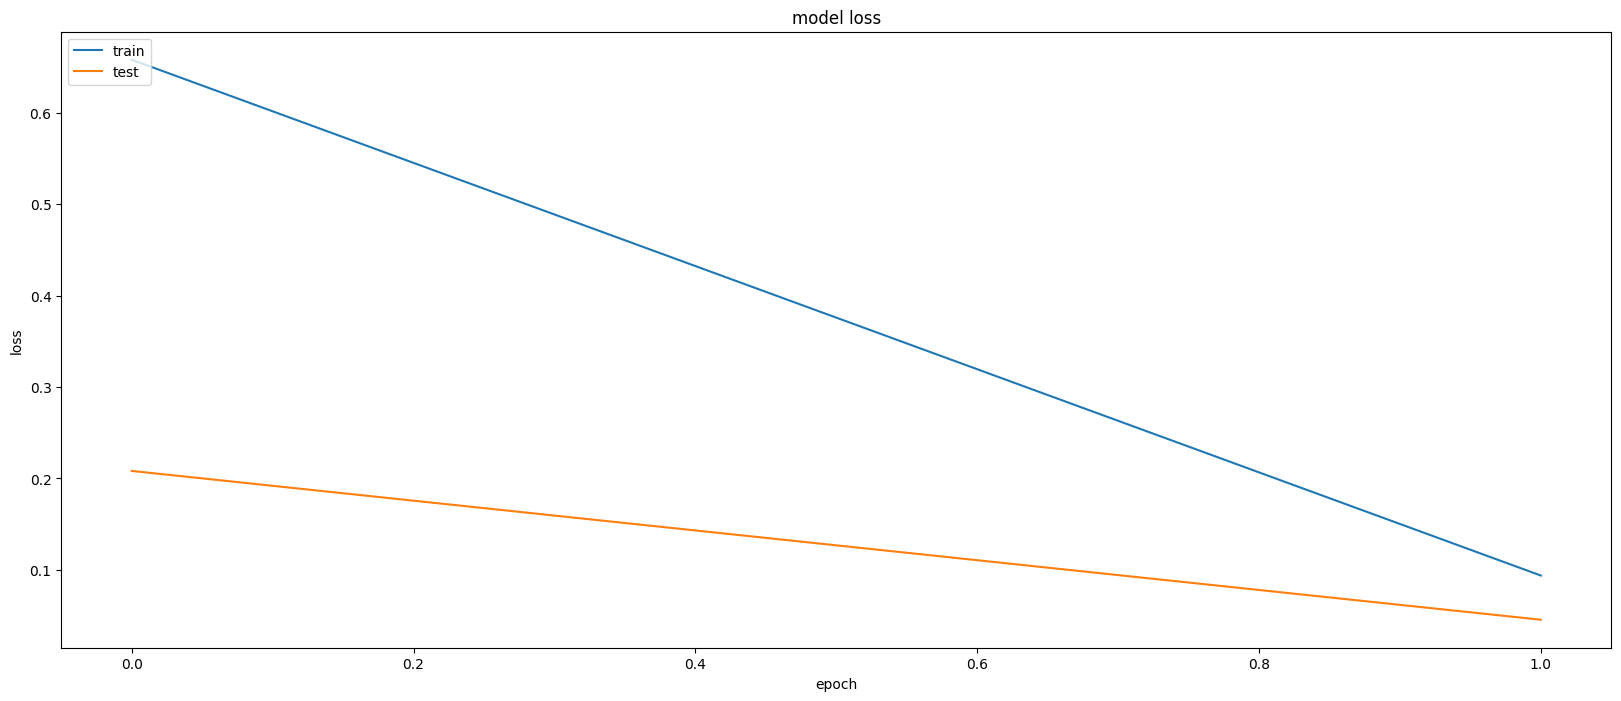

In [53]:
# DISPLAYING MODEL TRAINING HISTORY

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.figure(figsize=(20,8))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [54]:

# Evaluate the model on test dataset
loss, acc = model.evaluate(x_test,y_test,verbose=1)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

4322/4322 [==============================] - 9s 2ms/step - loss: 0.0453 - acc: 0.9930
Test loss: 0.045304927974939346
Test Accuracy: 0.9929715991020203


In [56]:
# predicting on test data.
pred_test = model.predict(x_test)
for i in range (len(pred_test)):
    if (pred_test[i] < 0.5):
        pred_test[i] = 0
    else:
        pred_test[i] = 1
pred_test = pred_test.astype(int)

def view_result(array):
    array = np.array(array)
    for i in range(len(array)):
        if array[i] == 0:
            print("Non Mallicious")
        else:
            print("Mallicious")

print("PREDICTED : ")
view_result(pred_test[:10])
print("\n")
print("ACTUAL : ")
view_result(y_test[:10])

4322/4322 [==============================] - 5s 1ms/step
PREDICTED : 
Non Mallicious
Non Mallicious
Non Mallicious
Mallicious
Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Mallicious


ACTUAL : 
Non Mallicious
Non Mallicious
Non Mallicious
Mallicious
Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Mallicious


### **Saving the prediction model**

In [57]:
# Save Model Weights and Architecture Together
model.save("Malicious_URL_Prediction.h5")

### **CONCLUSION : The objective of this notebook have been achieved. We trained and saved our models which we can now use in production environment.**

In [8]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
